In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset


import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import glob as glob
from PIL import Image


In [2]:
import pandas as pd

In [3]:
path='D:/DataSets/object detection/mnist_detection/mnist_detection/'
train_image_list=glob.glob(path+'train/images/*.*')
train_label_list=glob.glob(path+'train/labels/*.*')
test_image_list=glob.glob(path+'test/images/*.*')
test_label_list=glob.glob(path+'test/labels/*.*')


In [4]:
len(train_image_list)

10000

In [5]:
len(train_label_list)

10000

In [6]:
print(len(test_image_list))
print(len(test_label_list))

1000
1000


In [7]:
train_image_list[:10]

['D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\0.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\10.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\100.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1000.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1001.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1002.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1003.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1004.png',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/images\\1005.png']

In [8]:
train_label_list[:10]

['D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\0.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\10.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\100.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1000.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1001.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1002.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1003.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1004.txt',
 'D:/DataSets/object detection/mnist_detection/mnist_detection/train/labels\\1005.txt']

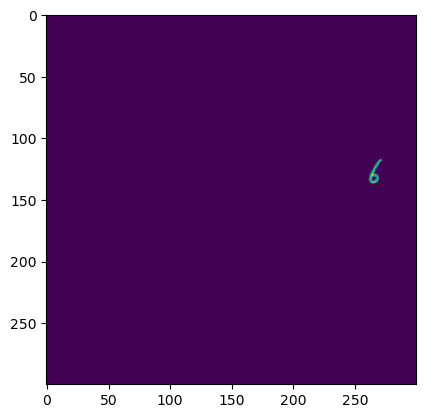

In [9]:
index=50
img=Image.open(train_image_list[index])
plt.imshow(img)

In [10]:
bbox=pd.read_csv(train_label_list[index]).values[0]

In [11]:
bbox

array([  6, 261, 117, 274, 138], dtype=int64)

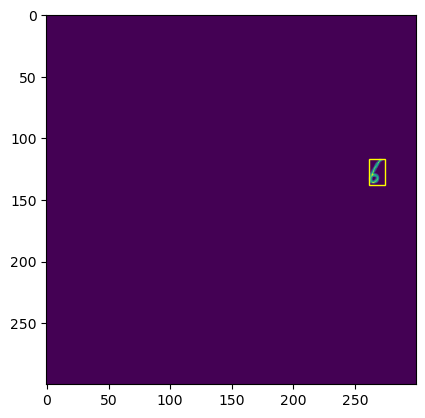

In [12]:
rect=plt.Rectangle((bbox[1],bbox[2]),bbox[3]-bbox[1],bbox[4]-bbox[2],color='yellow',fill=False)
plt.imshow(img)
plt.gca().add_patch(rect)


In [13]:
bbox

array([  6, 261, 117, 274, 138], dtype=int64)

In [14]:
img.size

(300, 300)

In [15]:
sz=229

In [16]:
img_res=transforms.Resize((sz,sz))


In [17]:
img=img_res(img)

In [18]:
img.size

(229, 229)

In [19]:
scale=sz/300
scale

0.7633333333333333

In [20]:
bboxnew=(bbox[1:]/300)*scale

In [21]:
bboxnew

array([0.6641    , 0.2977    , 0.69717778, 0.35113333])

In [22]:
bbox[1:]=(bboxnew/scale)*229

In [23]:
bbox

array([  6, 199,  89, 209, 105], dtype=int64)

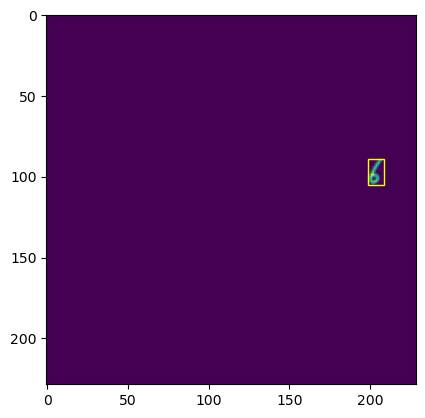

In [24]:
rect=plt.Rectangle((bbox[1],bbox[2]),bbox[3]-bbox[1],bbox[4]-bbox[2],color='yellow',fill=False)
plt.imshow(img)
plt.gca().add_patch(rect)

In [25]:
(w,h)=img.size

In [26]:
w

229

In [27]:
class mnist_dataset(Dataset):
    def __init__(self,images,bbox,sz):
        self.images=images
        self.bbox=bbox
        self.sz=sz
        self.transforms=transforms.Compose([transforms.Resize((sz,sz)),transforms.ToTensor()])
                                            
    def __getitem__(self,index):
        image=self.images[index] 
        image=Image.open(image)
        (w,h)=image.size 
        image=self.transforms(image)
        scale=sz/w                                    
        annotation=pd.read_csv(self.bbox[index]).values[0]   
        lbl=annotation[0]
        bbox=annotation[1:]
        bbox=torch.Tensor(bbox)                                    
        bbox=(bbox/w)*scale
        return image,lbl,bbox,(w,h)
                                            
    def __len__(self):
          return len(self.images)                                  
    

In [28]:
train_ds=mnist_dataset(train_image_list,train_label_list,229)

In [29]:
train_dl=DataLoader(dataset=train_ds,batch_size=16,shuffle=False)

In [30]:
images,labels,bboxs,_=next(iter(train_dl))

In [31]:
len(images)

16

In [32]:
images.size()

torch.Size([16, 1, 229, 229])

In [33]:
labels

tensor([6, 2, 1, 6, 1, 3, 6, 2, 7, 5, 5, 7, 6, 9, 7, 7])

In [34]:
bboxs

tensor([[0.6870, 0.6641, 0.7201, 0.7124],
        [0.1552, 0.6132, 0.2036, 0.6616],
        [0.3766, 0.4834, 0.4198, 0.6081],
        [0.5089, 0.4427, 0.6234, 0.6030],
        [0.2366, 0.6895, 0.2570, 0.7353],
        [0.6005, 0.5521, 0.7099, 0.6717],
        [0.0585, 0.1527, 0.1349, 0.2417],
        [0.5445, 0.1145, 0.6463, 0.2163],
        [0.3053, 0.1628, 0.3740, 0.2494],
        [0.4351, 0.3715, 0.5649, 0.5521],
        [0.4656, 0.2646, 0.5420, 0.3308],
        [0.2265, 0.4173, 0.2952, 0.4936],
        [0.4097, 0.0433, 0.5013, 0.1908],
        [0.6437, 0.0941, 0.7175, 0.1959],
        [0.1527, 0.1679, 0.1934, 0.2188],
        [0.2595, 0.3410, 0.3181, 0.4300]])

In [35]:
model=models.resnet34()

In [36]:
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
class customModel(nn.Module):
    def __init__(self,numclass=10):
        super(customModel,self).__init__()
        self.numclass=numclass
        model=models.resnet34()
        model.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        in_feature=model.fc.in_features
        model.fc=nn.Linear(in_features=in_feature, out_features=numclass+4, bias=True)
        self.model=model
        
    def forward(self,x):
        out=self.model(x)
        score=out[:,:self.numclass]
        bbox=out[:,self.numclass:]
        return score,torch.sigmoid(bbox)
        
        

In [38]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss,self).__init__()
        self.crossEntropy=nn.CrossEntropyLoss()
        self.mse=nn.MSELoss(reduction='sum')
    def forward(self,score,lbl,pbbox,bbox):
        clsLoss=self.crossEntropy(score,lbl)
        l1=self.mse(pbbox[:,0],bbox[:,0])
        l2=self.mse(pbbox[:,1],bbox[:,1])
        l3=self.mse(pbbox[:,2],bbox[:,2])
        l4=self.mse(pbbox[:,3],bbox[:,3])
        return clsLoss+l1+l2+l3+l4
      

In [39]:
model=customModel()

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [41]:
citeration=customLoss()

In [42]:
model=model.to(device)
citeration=citeration.to(device)

In [43]:
optimizer=optim.Adam(params=model.parameters(),lr=0.00001)

In [44]:
epoch=1

In [45]:
for i in range(epoch):
    sumloss=0
    for idx,(images,lbl,bbox,_)in enumerate(train_dl):
        images=images.to(device)
        lbl=lbl.to(device)
        bbox=bbox.to(device)
        score,pbbox=model(images)
        loss=citeration(score,lbl,pbbox,bbox)
        sumloss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if idx % 50 == 0 :
            print (f'loss in idx { idx+1 } equal to {loss}')
    print(f'loss in epoch number {epoch+1} is equal to {sumloss}')         
            
        

loss in idx 1 equal to 8.21833610534668
loss in idx 51 equal to 2.7961530685424805
loss in idx 101 equal to 2.851792812347412
loss in idx 151 equal to 2.470338821411133
loss in idx 201 equal to 2.27384352684021
loss in idx 251 equal to 2.3525331020355225
loss in idx 301 equal to 2.4454164505004883
loss in idx 351 equal to 2.149625539779663
loss in idx 401 equal to 2.30112886428833
loss in idx 451 equal to 2.3013267517089844
loss in idx 501 equal to 2.4674935340881348
loss in idx 551 equal to 2.141519784927368
loss in idx 601 equal to 1.9807168245315552
loss in epoch number 2 is equal to 1576.565185546875


In [46]:
images,_,_,size=next(iter(train_dl))

In [47]:
images.size()

torch.Size([16, 1, 229, 229])

In [48]:
images=images.to(device)

In [49]:
score,pbbox=model(images)

In [50]:
score.size()

torch.Size([16, 10])

In [51]:
score[3]

tensor([ 0.5263, -1.0643,  0.6694,  0.4619, -0.0334,  0.6235,  0.3366,  0.0833,
         0.7022, -0.0091], device='cuda:0', grad_fn=<SelectBackward0>)

In [52]:
pbbox.size()

torch.Size([16, 4])

In [53]:
pbbox[0]

tensor([0.5955, 0.6386, 0.6344, 0.6639], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [54]:
pbbox=(pbbox/scale)*229

In [55]:
pbbox[0].unsqueeze(0).size()

torch.Size([1, 4])

In [56]:
from torch.utils.tensorboard import SummaryWriter

In [57]:
writer=SummaryWriter(log_dir='log/mnist')

In [61]:
for i in range(len(images)):
     writer.add_image_with_boxes(tag='images',img_tensor=images[i],box_tensor=pbbox[i].unsqueeze(0),global_step=i,labels=str(score[i].argmax().item()))
writer.flush()
writer.close()

In [62]:
test_ds=mnist_dataset(test_image_list,test_label_list,229)

In [63]:
test_dl=DataLoader(dataset=test_ds,batch_size=16,shuffle=False)

In [64]:
images,_,_,size=next(iter(test_dl))

In [65]:
images=images.to(device)
score,pbbox=model(images)
pbbox=(pbbox/scale)*229

In [66]:
for i in range(len(images)):
     writer.add_image_with_boxes(tag='test_images',img_tensor=images[i],box_tensor=pbbox[i].unsqueeze(0),global_step=i,labels=str(score[i].argmax().item()))
writer.flush()
writer.close()